Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [11]:
import pandas as pd

# Joining the two dataframes

flattenedfoursquaredata = pd.read_csv('..\\data\\flattenedfoursquaredata.csv')

flattenedyelpdata4=pd.read_csv('..\\data\\flattenedyelpdata.csv')

new_dataframe = pd.concat([flattenedfoursquaredata, flattenedyelpdata4])

new_dataframe

,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,...,location.address2,location.address3,location.city,location.zip_code,location.state,location.display_address,attributes.business_temp_closed,attributes.menu_url,attributes.open24_hours,attributes.waitlist_reservation
0,4d93318162ad5481a9ec7b4b,"[{'id': 10027, 'name': 'Museum', 'short_name':...",[],VeryLikelyOpen,172.000000,/v3/places/4d93318162ad5481a9ec7b4b,Whitehern Historic House and Garden,America/Toronto,43.254593,-79.872110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50a19225e4b035e940520491,"[{'id': 13305, 'name': 'Burrito Restaurant', '...",[{'id': '2d108fae-d80a-482b-a105-57ab79c2581e'...,VeryLikelyOpen,320.000000,/v3/places/50a19225e4b035e940520491,Burrito Boyz,America/Toronto,43.255691,-79.867215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55de230f498eecf46f6652a2,"[{'id': 13306, 'name': 'Taco Restaurant', 'sho...",[],VeryLikelyOpen,343.000000,/v3/places/55de230f498eecf46f6652a2,The Mule,America/Toronto,43.257258,-79.867202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4b628f4bf964a5205a4b2ae3,"[{'id': 17065, 'name': 'Farmers Market', 'shor...",[],LikelyOpen,395.000000,/v3/places/4b628f4bf964a5205a4b2ae3,Hamilton Farmers' Market,America/Toronto,43.259041,-79.870193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,511d7162e4b084a5d1f26958,"[{'id': 13065, 'name': 'Restaurant', 'short_na...",[],VeryLikelyOpen,357.000000,/v3/places/511d7162e4b084a5d1f26958,The George Hamilton,America/Toronto,43.258200,-79.873853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,NaN,"[{'alias': 'bbq', 'title': 'Barbeque'}]",NaN,NaN,870.642254,NaN,Charred Chicken,NaN,NaN,NaN,...,NaN,NaN,Hamilton,L8R 2L2,ON,"['244 James Street N', 'Hamilton, ON L8R 2L2',...",NaN,NaN,NaN,NaN
1076,NaN,"[{'alias': 'japanese', 'title': 'Japanese'}]",NaN,NaN,434.625159,NaN,Sapporo Japanese Restaurant,NaN,NaN,NaN,...,NaN,NaN,Hamilton,L8N 1G3,ON,"['96 Main St E', 'Hamilton, ON L8N 1G3', 'Cana...",NaN,NaN,NaN,NaN
1077,NaN,"[{'alias': 'mideastern', 'title': 'Middle East...",NaN,NaN,727.434649,NaN,La Luna,NaN,NaN,NaN,...,NaN,NaN,Hamilton,L8P 1B1,ON,"['306 King Street W', 'Hamilton, ON L8P 1B1', ...",NaN,NaN,NaN,NaN
1078,NaN,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",NaN,NaN,572.271873,NaN,Bronzie's Place,NaN,NaN,NaN,...,NaN,NaN,Hamilton,L8P 3A8,ON,"['201 James Street S', 'Hamilton, ON L8P 3A8',...",NaN,http://bronzies.ca/lunch-dinner-menu/,NaN,NaN


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

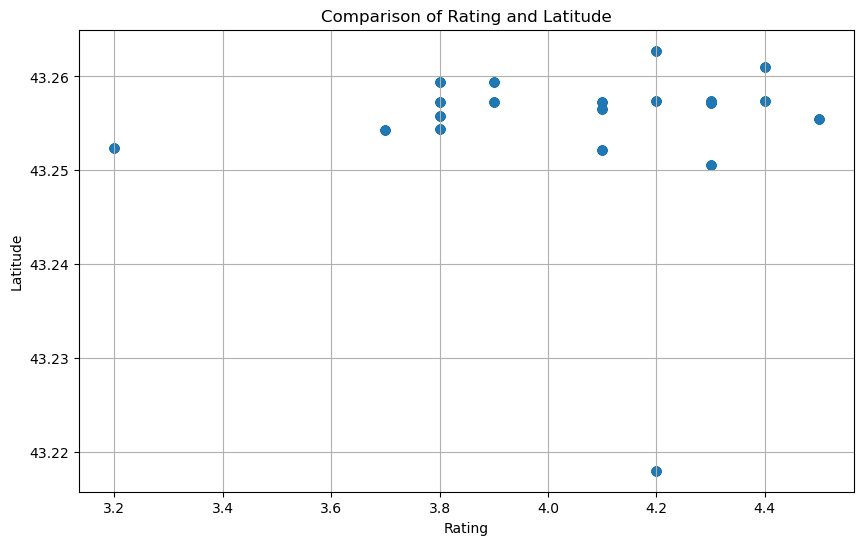

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Scatter plot to compare 'rating' and 'coordinates.latitude'
plt.figure(figsize=(10, 6))
plt.scatter(new_dataframe['rating'], new_dataframe['coordinates.latitude'], alpha=0.5)
plt.title('Comparison of Rating and Latitude')
plt.xlabel('Rating')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

c:\Users\james\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


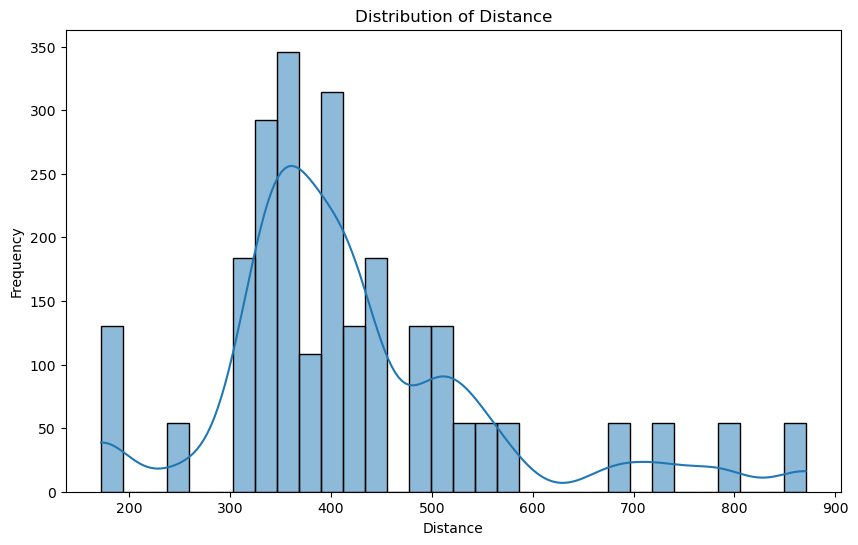

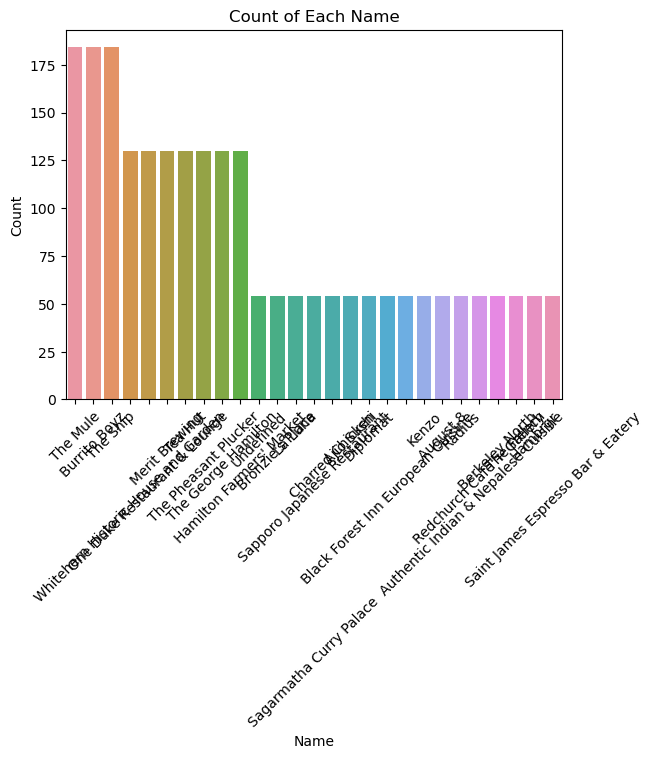

In [13]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Show distribution of distance of each POI to the main ll

# # Distribution of 'distance'
 plt.figure(figsize=(10, 6))
 sns.histplot(new_dataframe['distance'], kde=True)
plt.title('Distribution of Distance')
plt.xlabel('Distance')
 plt.ylabel('Frequency')
 plt.show()

# # Count of each 'name'
# plt.figure(figsize=(12, 8))
 sns.countplot(data=new_dataframe, x='name', order=new_dataframe['name'].value_counts().index)
 plt.title('Count of Each Name')
 plt.xlabel('Name')
 plt.ylabel('Count')
 plt.xticks(rotation=45)
 plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [14]:
import sqlite3
import pandas as pd

# Putting results in an SQLite3 database

# Create a connection to SQLite database
conn = sqlite3.connect('datacombine.db')

# Convert DataFrame to SQLite database table
new_dataframe.to_sql('data_table', conn, if_exists='replace', index=False)

# Commit changes and close connection
conn.commit()
conn.close()

Look at the data before and after the join to validate your data.

In [15]:
import pandas as pd

# for BEFORE view, Load the original DataFrames flattenedYELPdata and flattenedfoursquaredata
flattenedYELPdata = pd.read_csv('..\\data\\flattenedYELPdata.csv')
flattenedfoursquaredata = pd.read_csv('..\\data\\flattenedfoursquaredata.csv')

# Before joining, validate the original data
print("Before joining:")
print("flattenedYELPdata:")
print(flattenedYELPdata.head())  # View the first few rows of flattenedYELPdata4
print("\ndf2:")
print(flattenedfoursquaredata.head())  # View the first few rows of flattenedfoursquaredata

Before joining:
flattenedYELPdata:
                       id                      alias            name  \
0  752Fv2jKafftvoS3Twkqyg           hambrgr-hamilton         Hambrgr   
1  bHecMQ85o3ayw1t9hRA90g        the-french-hamilton      The French   
2  h2mI1wBIK1PyaNupaL58gw          the-mule-hamilton        The Mule   
3  9oIPWjU3DvtSdORv6I2toQ          the-ship-hamilton        The Ship   
4  xwVB61hW9rpyp6wALR4Apg  berkeley-north-hamilton-2  Berkeley North   

                                           image_url  is_closed  \
0  https://s3-media2.fl.yelpcdn.com/bphoto/3QVAoc...      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/Ha71df...      False   
2  https://s3-media4.fl.yelpcdn.com/bphoto/bbhfnn...      False   
3  https://s3-media2.fl.yelpcdn.com/bphoto/dvWeA7...      False   
4  https://s3-media1.fl.yelpcdn.com/bphoto/dR82Kl...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/hambrgr-hamilton?adju...       

In [16]:
# Performing the join operation
new_dataframe1 = pd.merge(flattenedYELPdata, flattenedfoursquaredata, on='name', how='right')
# Validating joint data
print("new_dataframe1:")
print(new_dataframe1.head())  # View the first few rows of the joined DataFrame

new_dataframe1:
                       id                  alias  \
0                     NaN                    NaN   
1  _Tl4-DH2ci_AVXq028__sg  burrito-boyz-hamilton   
2  _Tl4-DH2ci_AVXq028__sg  burrito-boyz-hamilton   
3  _Tl4-DH2ci_AVXq028__sg  burrito-boyz-hamilton   
4  _Tl4-DH2ci_AVXq028__sg  burrito-boyz-hamilton   

                                  name  \
0  Whitehern Historic House and Garden   
1                         Burrito Boyz   
2                         Burrito Boyz   
3                         Burrito Boyz   
4                         Burrito Boyz   

                                           image_url is_closed  \
0                                                NaN       NaN   
1  https://s3-media4.fl.yelpcdn.com/bphoto/p3C2_M...     False   
2  https://s3-media4.fl.yelpcdn.com/bphoto/p3C2_M...     False   
3  https://s3-media4.fl.yelpcdn.com/bphoto/p3C2_M...     False   
4  https://s3-media4.fl.yelpcdn.com/bphoto/p3C2_M...     False   

                     

In [17]:
# Sending new_dataframe to CSV
new_dataframe.to_csv('..\\data\\new_dataframe.csv', index=False)